In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors, plot_betas

ms = load_from_json(deepcopy(math_spec_json))



## Constant Difficulty, K Qi, K Quai, Population Beta Values

A simulation with the above state updates turned off to test basic simulation running.

Placeholder has no control action options
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN              -3.0            0.0001   
1          -4.990226     -466.900127              -3.0            0.0001   
2          -4.990226     -466.900127              -3.0            0.0001   
3          -4.990226     -466.900127              -3.0            0.0001   
4          -4.972137     -394.016227              -3.0            0.0001   
...              ...             ...               ...               ...   
1996        1.262440       24.880324              -3.0            0.0001   
1997        0.958830       -9.560495              -3.0            0.0001   
1998        0.958830       -9.560495              -3.0            0.0001   
1999        0.958830       -9.560495              -3.0            0.0001   
2000        0.958830       -9.560495              -3.0            0.0001   

         Qi Supply   Quai Supply  Locked Qi S

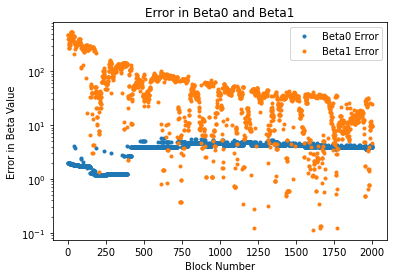

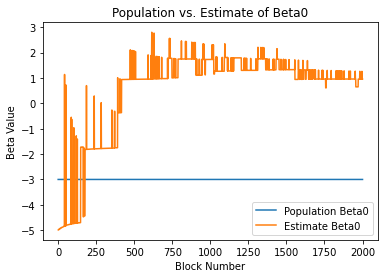

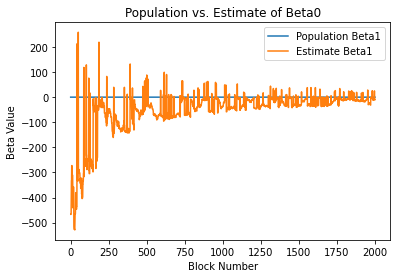

In [25]:
T = 2000
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T





experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Difficulty"]},
               "State Modifications": {"Block Difficulty": 1000,
                                       "Population Mining Beta Vector": np.array([-3, 0.0001])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)

## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low difficulties
Difficulty was getting adjusted to be below 2, setting to 2 to avoid issues from extremely low

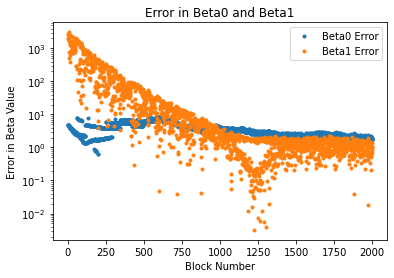

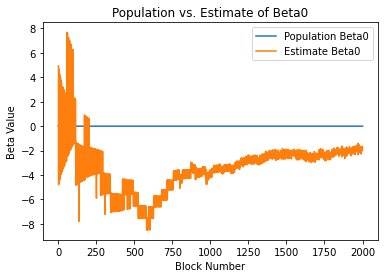

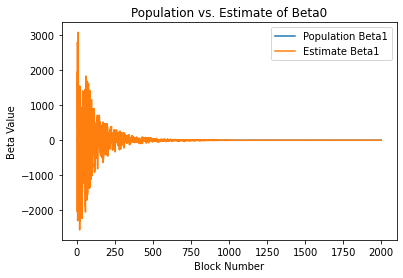

In [2]:
T = 2000
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)

In [3]:
from math import log2

In [6]:
log2(1)

0.0

## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


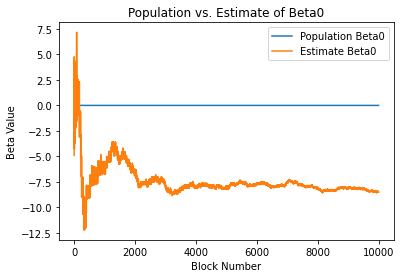

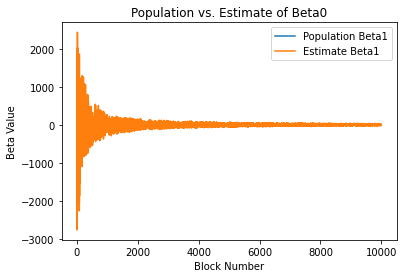

In [ ]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

<AxesSubplot:>

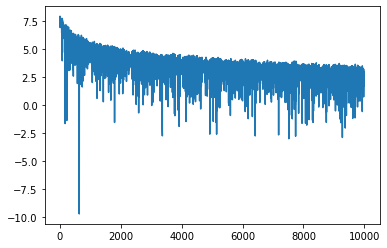

In [ ]:
np.log(((df['Estimate Beta1'] - df['Population Beta1']).abs())).plot(kind='line')

<AxesSubplot:>

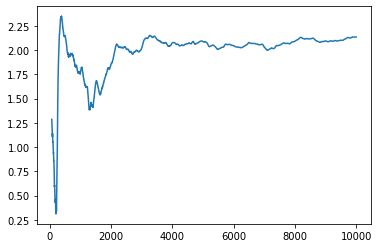

In [ ]:
np.log(((df['Estimate Beta0'] - df['Population Beta0']).abs().rolling(60).mean())).plot(kind='line')

In [ ]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.911427,-2565.989084,0.0,0.001,1
1,4.864229,272.754983,0.0,0.001,2
2,4.817954,246.866307,0.0,0.001,3
3,4.736978,209.490166,0.0,0.001,4
4,4.693199,188.919606,0.0,0.001,5
...,...,...,...,...,...
9995,-2.736295,1.721188,0.0,0.001,9996
9996,-2.736297,1.719730,0.0,0.001,9997
9997,-2.798423,-29.712047,0.0,0.001,9998
9998,-2.736303,6.300191,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


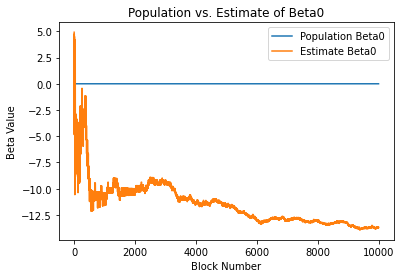

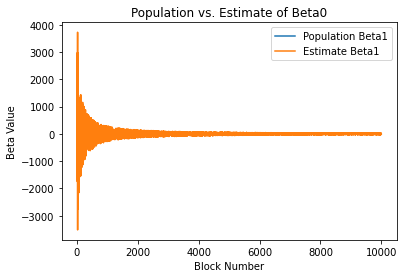

In [ ]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [ ]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.911488,2498.663411,0.0,0.001,1
1,-4.845131,-1456.635453,0.0,0.001,2
2,4.807790,2543.217396,0.0,0.001,3
3,4.745125,2569.696905,0.0,0.001,4
4,4.710479,2386.611900,0.0,0.001,5
...,...,...,...,...,...
9995,-13.702757,-17.489350,0.0,0.001,9996
9996,-13.640623,12.952015,0.0,0.001,9997
9997,-13.640626,19.921908,0.0,0.001,9998
9998,-13.640629,19.490908,0.0,0.001,9999


In [ ]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.3938309600750329


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


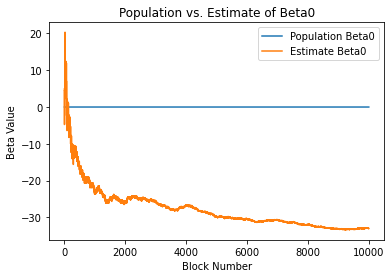

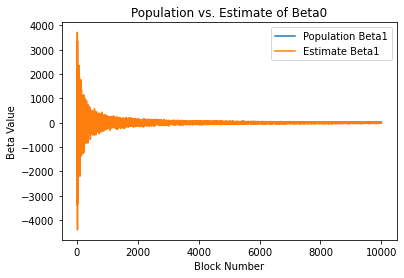

In [ ]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [ ]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.921281,1822.687518,0.0,0.001,1
1,4.863854,2226.955188,0.0,0.001,2
2,-4.761410,-2441.757961,0.0,0.001,3
3,4.762503,1155.161968,0.0,0.001,4
4,-4.566489,-3376.331293,0.0,0.001,5
...,...,...,...,...,...
9995,-32.928361,15.226791,0.0,0.001,9996
9996,-32.928363,17.938123,0.0,0.001,9997
9997,-32.928364,18.564570,0.0,0.001,9998
9998,-32.928365,19.124022,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


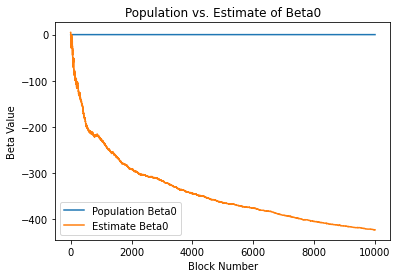

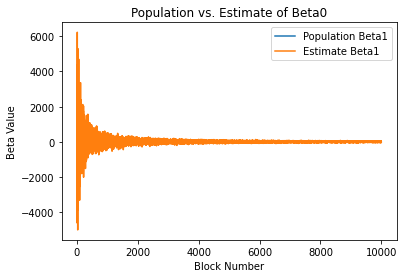

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0           4.970635     -789.685150               0.0             0.001   
1           5.047176    -4596.250336               0.0             0.001   
2           5.139779     1640.357551               0.0             0.001   
3          -4.366044    -1417.866445               0.0             0.001   
4          -4.357270     -169.790060               0.0             0.001   
...              ...             ...               ...               ...   
9995     -423.330389       37.627440               0.0             0.001   
9996     -423.454654      -38.544796               0.0             0.001   
9997     -423.392523      -34.036786               0.0             0.001   
9998     -423.330400       41.334200               0.0             0.001   
9999     -423.392514       11.371902               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [ ]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)